Enter number of frames:  4
Enter page sequence (space-separated):  1 2 3 4


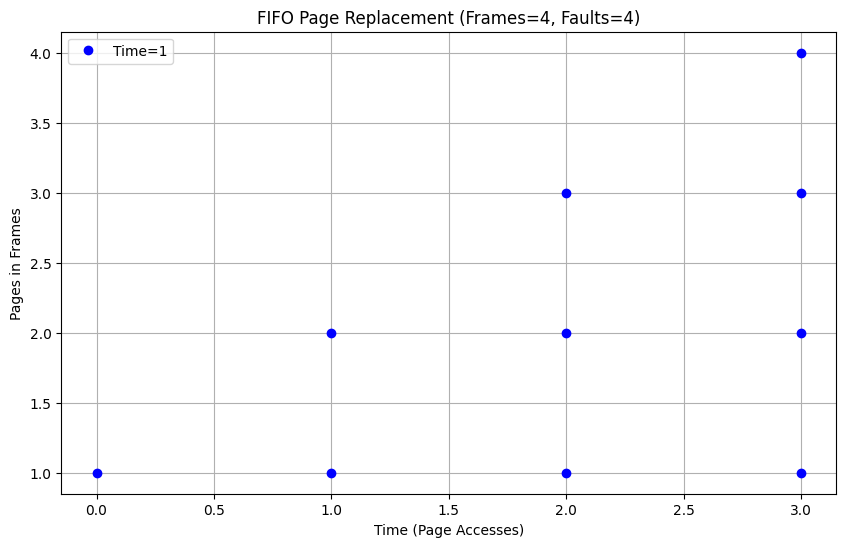


Frame state at each time step (Page Accessed, Frames, Hit/Miss):
   Page Accessed  Frame 1 Frame 2 Frame 3 Frame 4 Hit/Miss
0              1        1    Miss                         
1              2        1       2    Miss                 
2              3        1       2       3    Miss         
3              4        1       2       3       4     Miss


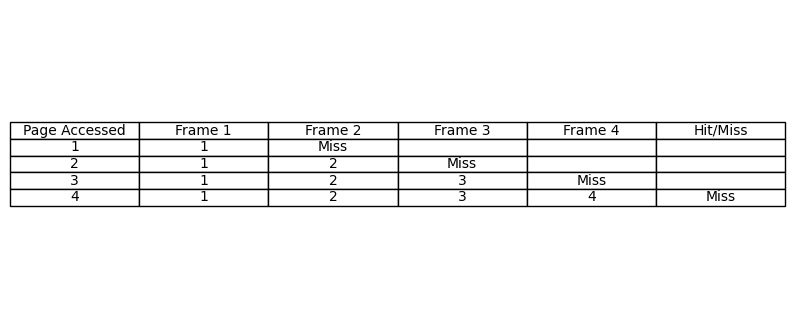

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

def fifo_page_replacement(frames_count, page_sequence):
    frames = []
    page_faults = 0
    frame_history = []  
    hit_miss_history = [] 

    for page in page_sequence:
        hit_miss = 'Miss'
        if page not in frames:
            page_faults += 1
            if len(frames) >= frames_count:
                frames.pop(0)  # Remove the oldest page
            frames.append(page)
        else:
            hit_miss = 'Hit'  # No reordering for FIFO

        # Record the current state of frames and hit/miss status
        frame_history.append(list(frames))
        hit_miss_history.append(hit_miss)

    return page_faults, frame_history, hit_miss_history


# Function to visualize the FIFO page replacement process (plot and table)
def visualize_fifo(frames_count, page_sequence):
    # Simulate FIFO page replacement
    page_faults, frame_history, hit_miss_history = fifo_page_replacement(frames_count, page_sequence)
    
    # Plot the frame history over time
    fig, ax = plt.subplots(figsize=(10, 6))

    for i, frame in enumerate(frame_history):
        ax.plot([i] * len(frame), frame, 'bo', label=f'Time={i+1}' if i == 0 else "")

    ax.set_xlabel('Time (Page Accesses)')
    ax.set_ylabel('Pages in Frames')
    ax.set_title(f'FIFO (Frames={frames_count}, Faults={page_faults})')

    plt.legend()
    plt.grid(True)
    plt.show()

    # Create DataFrame for tabular visualization
    max_frames = frames_count
    data = []

    for i in range(len(frame_history)):
        row = [page_sequence[i]] + frame_history[i] + [hit_miss_history[i]]
        row += [''] * (max_frames - len(frame_history[i]))  # Pad empty slots for unused frames
        data.append(row)

    columns = ['Page Accessed'] + [f'Frame {i+1}' for i in range(max_frames)] + ['Hit/Miss']
    df = pd.DataFrame(data, columns=columns)
    
    print("\nFrame state at each time step (Page Accessed, Frames, Hit/Miss):")
    print(df)

    # Optionally display the DataFrame as a table in the plot
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    table_data = df.values.tolist()
    table = ax.table(cellText=table_data, colLabels=df.columns, loc='center', cellLoc='center')
    plt.show()


# Main function to handle user input
def main():
    frames_count = int(input("Enter number of frames: "))
    page_sequence = list(map(int, input("Enter page sequence (space-separated): ").split()))

    # Visualize the FIFO process (plot and table)
    visualize_fifo(frames_count, page_sequence)

# Run the main function
if __name__ == "__main__":
    main()
